In [6]:
# Import the required libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plot the adjusted closing prices of multiple ETFs over a given period.

    Parameters:
    tickers (list): List of ETF tickers (e.g., ['DOW', 'DOG']).
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Download historical data for the tickers
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Ensure 'Adj Close' or 'Close' column exists
    if "Adj Close" in data.columns:
        data = data["Adj Close"]
    elif "Close" in data.columns:
        data = data["Close"]
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the data.")

    # Normalize prices to start at 100 for better comparison
    normalized_data = (data / data.iloc[0]) * 100

    # Plot the normalized data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    # Add title, labels, legend, and grid
    plt.title("DOW vs. DOG Performance Comparison (Covid)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
    plt.legend(tickers, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

In [8]:
# Set the tickers and time range
tickers = ["DOW", "DOG"]
start_date = "2020-01-01"
end_date = "2020-12-31"

In [9]:
# Download and inspect the data structure
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())
print("Columns available:", data.columns)

Price           Close                  High                   Low             \
Ticker            DOG        DOW        DOG        DOW        DOG        DOW   
Date                                                                           
2020-01-02  43.999367  41.366867  44.369640  42.744481  43.990334  41.282209   
2020-01-03  44.369637  40.343273  44.514133  41.251420  44.234169  40.335578   
2020-01-06  44.243198  40.181664  44.676689  40.697308  44.243198  40.020045   
2020-01-07  44.423820  40.166264  44.459946  40.839678  44.297386  40.012343   
2020-01-08  44.198048  40.581860  44.532200  40.920490  44.008396  39.958469   

Price            Open             Volume           
Ticker            DOG        DOW     DOG      DOW  
Date                                               
2020-01-02  44.342545  42.505899  301900  5145200  
2020-01-03  44.496071  40.874310  288400  5004300  
2020-01-06  44.676689  40.266322  183200  4293100  
2020-01-07  44.342541  40.243227   66200  51228

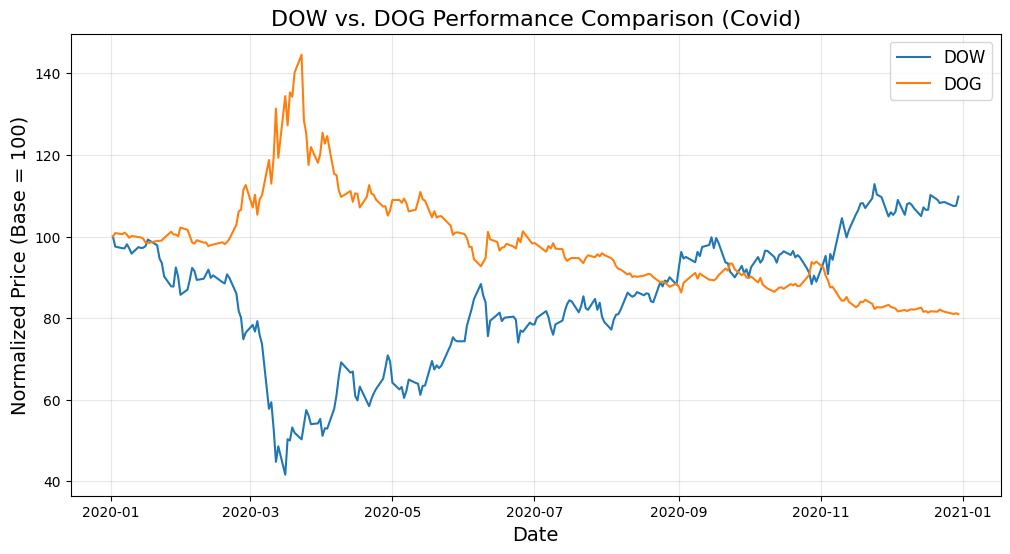

In [10]:
# Call the function to plot the comparison
plot_etfs_comparison(tickers, start_date, end_date)